In [1]:
# Loading the libraries 
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist   # Loading the MNIST Dataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [3]:
# Preprocess the Data: Normalize the pixel values and reshape the images.

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [4]:
# Build the LeNet-5 Model

model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model 

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8200 - loss: 0.5994 - val_accuracy: 0.9750 - val_loss: 0.0867
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9693 - loss: 0.1062 - val_accuracy: 0.9777 - val_loss: 0.0782
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9783 - loss: 0.0728 - val_accuracy: 0.9828 - val_loss: 0.0620
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9820 - loss: 0.0567 - val_accuracy: 0.9853 - val_loss: 0.0515
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9857 - val_loss: 0.0488


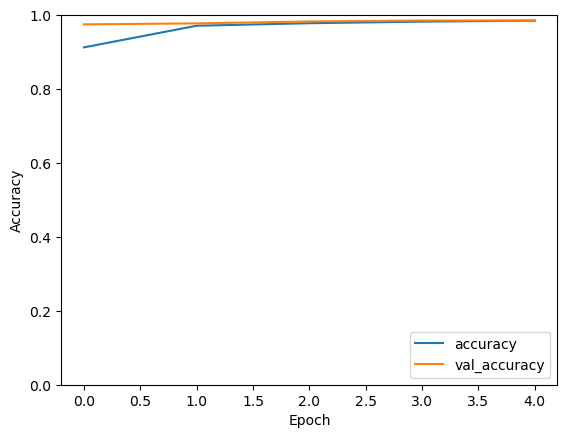

In [7]:
# Plot Training History

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [8]:
# Evaluate the model on test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9840 - loss: 0.0525
Test accuracy: 0.9868999719619751


In [9]:
# Make predictions 

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


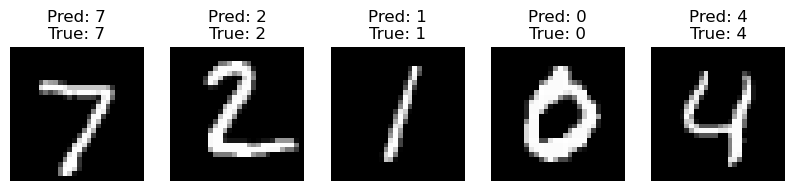

In [10]:
def plot_predictions(images, labels, predictions, num=5):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {np.argmax(predictions[i])}\nTrue: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(x_test, y_test, predictions)